In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.gridspec as gridspec
import os
%matplotlib inline

In [2]:
def agg_pixels(img_dir, remove_white=True):
    img_files = [img_dir + filename for filename in os.listdir(img_dir) if filename.endswith('.png')]
    data_list = []
    for img_file in img_files:
        img = Image.open(img_file)
        data = np.array(img)
        W, H, C = data.shape
        data = data.reshape([W*H, C])
        if remove_white:
            data = data[np.mean(data[:,:3], 1) != 255]
        data_list.append(data)
    return np.concatenate(data_list)

In [3]:
def agg_hist_intersection(agg_data1, agg_data2, channel_idx):
    hist1, bins = np.histogram(agg_data1[:,channel_idx], bins=256, range=(0, 255), density=True)
    hist2, bins = np.histogram(agg_data2[:,channel_idx], bins=256, range=(0, 255), density=True)
    bins = np.diff(bins)
    total = 0
    for j in range(len(bins)):
        total += min(bins[j] * hist1[j], bins[j] * hist2[j])
    return total

In [4]:
def plot_agg_hists(agg_ori, agg_trans, agg_ref, filename, num_channels=3, channel_names=['R', 'G', 'B', 'A']):
    # Set up the grid
    fig = plt.figure(figsize=(num_channels, 1))
    gs = gridspec.GridSpec(1, num_channels)
    gs.update(wspace=0.05, hspace=0.05)
    
    
    fig, axes = plt.subplots(1, num_channels, figsize=(5*num_channels,5))
    for i in range(num_channels):
        if i == 0:
            channel = 'R'
        elif i == 1:
            channel = 'G'
        elif i == 2:
            channel = 'B'
        elif i == 3:
            channel = 'A'        
        axes[i].hist(agg_ori[:,i], bins=256, range=(0,255), density=True, 
                     alpha=0.35, label='source', color='tab:orange')
        axes[i].hist(agg_trans[:,i], bins=256, range=(0,255), density=True, 
                     alpha=0.35, label='normalized', color='tab:red')
        axes[i].hist(agg_ref[:,i], bins=256, range=(0,255), density=True, 
                     alpha=0.35, label='target', color='tab:purple')
        axes[i].legend(loc='upper left')
        axes[i].set_title(channel)
    plt.savefig(filename)

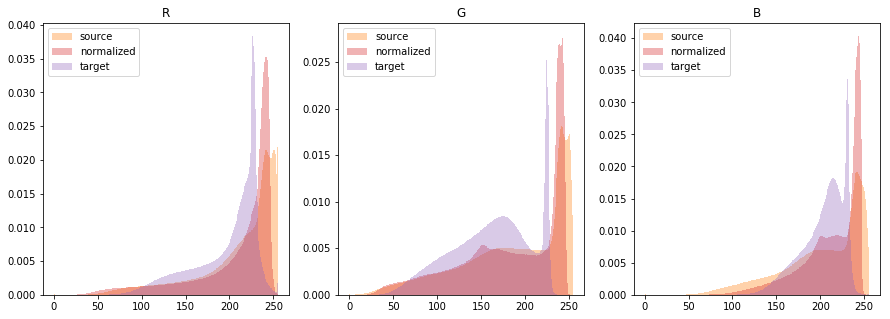

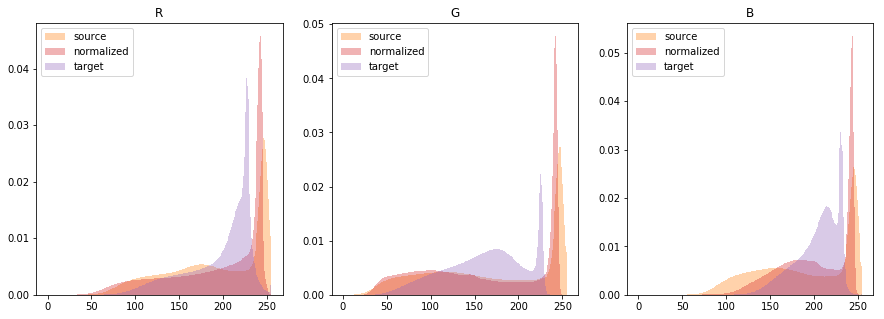

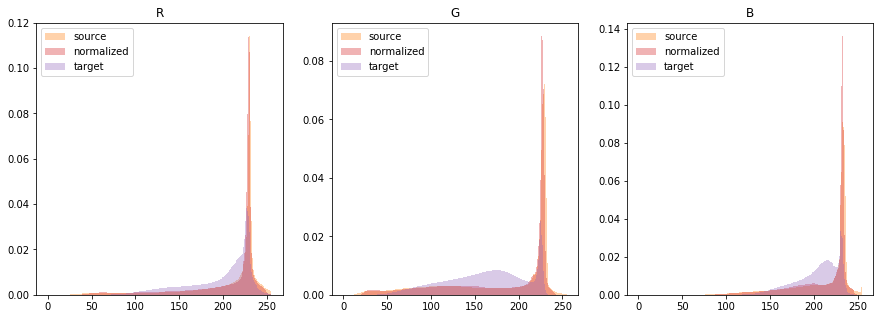

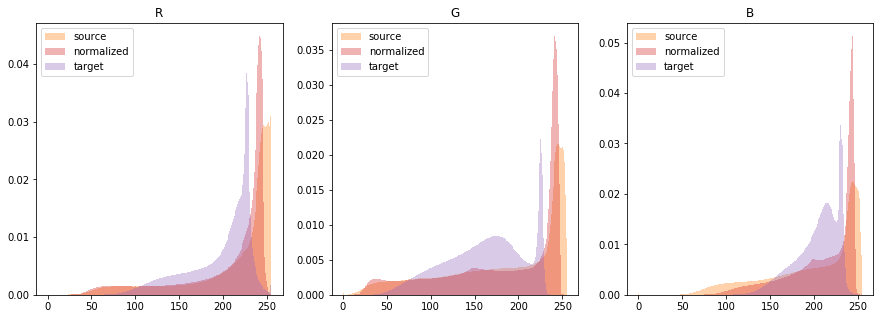

In [5]:
for center in range(4):
    dir_ori = '/home/shared/data/center_' + str(center) + '_patches/color/'
    dir_trans = '/home/shared/unet_results/0602_l2/center_' + str(center) + '_results/eval_results/imgs/'
    dir_target = '/home/shared/data/center_4/datasets/test/color/'

    agg_ori = agg_pixels(dir_ori)
    agg_trans = agg_pixels(dir_trans)
    agg_target = agg_pixels(dir_target)
    
    filename = 'center_' + str(center) + '_unet_l2_hist.png'
    plot_agg_hists(agg_ori, agg_trans, agg_target, filename)

In [6]:
#dir_ori = '/home/shared/data/center_0_patches/color/'
#dir_trans = '/home/shared/unet_results/0602_l2/center_0_results/eval_results/imgs/'
#dir_target = '/home/shared/data/center_4/datasets/test/color/'

In [7]:
#agg_ori = agg_pixels(dir_ori)
#agg_trans = agg_pixels(dir_trans)
#agg_target = agg_pixels(dir_target)